In [21]:
# 可使用4種距離算法
# 完成基本Knn & weighted knn
# KD-tree & ball-tree 沒做 
# 並最後與sklearn 版本 knn 比較

iris_names         : ['setosa' 'versicolor' 'virginica']
iris_feature_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


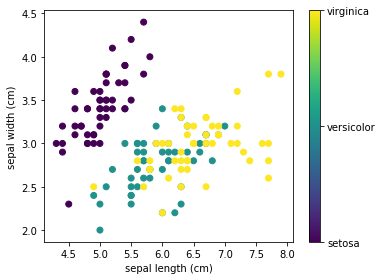

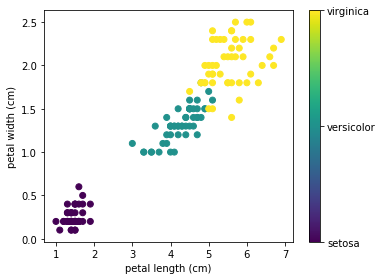

In [22]:
# import iris dataset
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('iris_names         : %s'%iris.target_names)
print('iris_feature_names : %s'%iris.feature_names)
for num in range(2):
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1+num)
    plt.scatter(iris.data[:, 0+num*2], iris.data[:, 1+num*2], c=iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[0+num*2])
    plt.ylabel(iris.feature_names[1+num*2])
    plt.tight_layout()
    plt.show()

In [23]:
from sklearn import preprocessing
X =preprocessing.normalize(X, norm='l2')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=6)

In [25]:
import numpy as np
print("<train data>")
print("setosa data     : %s" %len(np.where(y_train==0)[0]))
print("versicolor data : %s" %len(np.where(y_train==1)[0]))
print("virginica data  : %s" %len(np.where(y_train==2)[0]))

<train data>
setosa data     : 25
versicolor data : 25
virginica data  : 25


In [26]:
print("<test data>")
print("setosa data     : %s" %len(np.where(y_test==0)[0]))
print("versicolor data : %s" %len(np.where(y_test==1)[0]))
print("virginica data  : %s" %len(np.where(y_test==2)[0]))

<test data>
setosa data     : 25
versicolor data : 25
virginica data  : 25


In [27]:
#k nearest neighbor
#假設預測點是i -->找出離i最近的k點 是哪一類別(?)多 -->預測i點為(?)類別
#這裡參考四種算距離的方法 :
#歐氏距離(Euclidean Distance)
#曼哈頓距離(Manhattan Distance)
#切比雪夫距離 ( Chebyshev Distance )
#閔可夫斯基距離(Minkowski Distance)

# 距離算法可以調整 /  /,'cityblock' / ,'chebyshev' / ,'minkowski',p=2
# 有兩種knn 一種基本 一種距離包含權重
%matplotlib inline
from scipy.spatial.distance import pdist
import numpy as np
from sklearn.metrics import accuracy_score

class KNNClassifier():
    def __init__(self):
        self.Dataset=np.array([])
        self.Labels=np.array([])
        self.Labels_kind=[]
        self.dist='Euclidean' #Euclidean/Manhattan/Chebyshev/Minkowski
        self.knn='base' #base/weighted
    
    def fit(self,dataset,labels):
        self.Dataset=dataset
        self.Labels=labels
        labels_kind=[]
        labels_math=len(set(self.Labels))
        labels_set=set(self.Labels)
        for label_numbers in range(labels_math):
            labels_kind.append(min(labels_set))
            labels_set.remove(min(labels_set))
        self.Labels_kind=labels_kind

    def predict(self,pre_dataset,k):
        ans_predict_list=[]
        labels_kind=[]
        labels_set=set(self.Labels)
        labels_math=len(set(self.Labels))
        trainlabels_list=[]
        for run_train_labels in range(len(self.Labels)):
            trainlabels_list.append(self.Labels[run_train_labels])
        for label_numbers in range(labels_math):
            labels_kind.append(min(labels_set))
            labels_set.remove(min(labels_set))
        data_num=pre_dataset.shape[0] 
        for running in range(data_num):
            k_predict_list=[]
            #print(running)
            for label_numbers in range(labels_math):
                k_predict_list.append(0)
            list_distance=[]
            for dist in range(self.Dataset.shape[0]):
                want_distance=np.vstack([pre_dataset[running],self.Dataset[dist]])
                #self.dist='Euclidean' #Euclidean/Manhattan/Chebyshev/Minkowski
                if(self.dist=='Euclidean'):
                    list_distance.append(pdist(want_distance)) 
                elif(self.dist=='Manhattan'):
                    list_distance.append(pdist(want_distance,'cityblock')) 
                elif(self.dist=='Chebyshev'):
                    list_distance.append(pdist(want_distance,'chebyshev')) 
                else:
                    list_distance.append(pdist(want_distance,'minkowski',p=2)) 
            #print(len(list_distance),len(trainlabels_list))
            #return(list_distance,self.Labels)
            
            list1, list2 = zip(*sorted(zip(list_distance, trainlabels_list)))
            #sorted_indices = np.argsort(np.array(list_distance), axis=0)
            #list_distance_np=np.array(list_distance)
            #list1 = list_distance_np[sorted_indices]
            #list2 = self.Labels[sorted_indices]
            for vote in range(k):
                for check in range(len(k_predict_list)):
                    if(list2[vote]==labels_kind[check]):
                        if(self.knn=='base'):
                            k_predict_list[check]+=1
                        else:
                            k_predict_list[check]+=1/list1[check]
            if(len(np.where(np.array(k_predict_list)==max(k_predict_list))[0])>1):
                for check in range(len(k_predict_list)):
                    if(list2[k]==labels_kind[check]):
                        k_predict_list[check]+=1
                ans_predict_list.append(np.where(np.array(k_predict_list)==max(k_predict_list))[0][0])
            else:
                ans_predict_list.append(np.where(np.array(k_predict_list)==max(k_predict_list))[0][0])
        return(ans_predict_list)

    def predict_findk(self,pre_dataset,y_test):
        k_range=[]
        k_score=[]
        for range_k in range(1,20):
            k_range.append(range_k)
            k_score.append(0)

        for k in k_range:
            ans_predict_list=[]
            labels_kind=[]
            labels_set=set(self.Labels)
            labels_math=len(set(self.Labels))
            trainlabels_list=[]
            for run_train_labels in range(len(self.Labels)):
                trainlabels_list.append(self.Labels[run_train_labels])
            for label_numbers in range(labels_math):
                labels_kind.append(min(labels_set))
                labels_set.remove(min(labels_set))
            data_num=pre_dataset.shape[0] 
            for running in range(data_num):
                k_predict_list=[]
                #print(running)
                for label_numbers in range(labels_math):
                    k_predict_list.append(0)
                list_distance=[]
                for dist in range(self.Dataset.shape[0]):
                    want_distance=np.vstack([pre_dataset[running],self.Dataset[dist]])
                    #self.dist='Euclidean' #Euclidean/Manhattan/Chebyshev/Minkowski
                    if(self.dist=='Euclidean'):
                        list_distance.append(pdist(want_distance)) 
                    elif(self.dist=='Manhattan'):
                        list_distance.append(pdist(want_distance,'cityblock')) 
                    elif(self.dist=='Chebyshev'):
                        list_distance.append(pdist(want_distance,'chebyshev')) 
                    else:
                        list_distance.append(pdist(want_distance,'minkowski',p=2)) 
                #print(len(list_distance),len(trainlabels_list))
                #return(list_distance,self.Labels)

                list1, list2 = zip(*sorted(zip(list_distance, trainlabels_list)))
                #sorted_indices = np.argsort(np.array(list_distance), axis=0)
                #list_distance_np=np.array(list_distance)
                #list1 = list_distance_np[sorted_indices]
                #list2 = self.Labels[sorted_indices]
                for vote in range(int(k)):
                    for check in range(len(k_predict_list)):
                        if(list2[vote]==labels_kind[check]):
                            if(self.knn=='base'):
                                k_predict_list[check]+=1
                            else:
                                k_predict_list[check]+=1/list1[check]
                if(len(np.where(np.array(k_predict_list)==max(k_predict_list))[0])>1):
                    for check in range(len(k_predict_list)):
                        if(list2[k]==labels_kind[check]):
                            k_predict_list[check]+=1
                    ans_predict_list.append(np.where(np.array(k_predict_list)==max(k_predict_list))[0][0])
                else:
                    ans_predict_list.append(np.where(np.array(k_predict_list)==max(k_predict_list))[0][0])
            k_score[k-1]=(accuracy_score(y_test,ans_predict_list))
        return("best k in 1 ~20 is : %s "%str(int(np.where(np.array(k_score)==max(k_score))[0][0])+1),int(np.where(np.array(k_score)==max(k_score))[0][0])+1)

In [28]:
#以下試驗 1.自己寫基本Knn 2.自己寫加權重後knn 3.sklearn knn 4.sklearn knn內部調參找knn
#ps 自己的knn非內部調參 而是直接看答案找最佳k值

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

best k in 1 ~20 is : 1 
accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

CONFUSE:


Text(91.68, 0.5, 'predicted label')

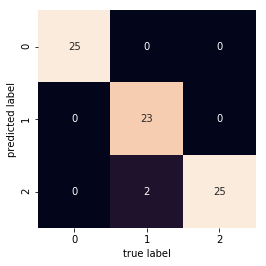

In [30]:
# base knn
knn=KNNClassifier()
knn.fit(X_train,y_train)
text,best_k=knn.predict_findk(X_test,y_test)
print(text)
y_pred=knn.predict(X_test,best_k)
print('accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("CONFUSE:")
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)#,xticklabels=faces.target_names,yticklabels=faces.target_names
plt.xlabel('true label')
plt.ylabel('predicted label')

best k in 1 ~20 is : 10 
accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

CONFUSE:


Text(91.68, 0.5, 'predicted label')

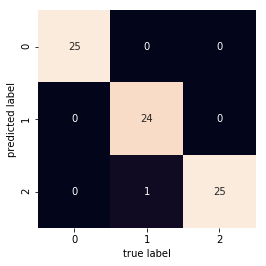

In [31]:
# weighted knn
knn=KNNClassifier()
knn.knn='weighted'
knn.fit(X_train,y_train)
text,best_k=knn.predict_findk(X_test,y_test)
print(text)
y_pred=knn.predict(X_test,best_k)
print('accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("CONFUSE:")
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)#,xticklabels=faces.target_names,yticklabels=faces.target_names
plt.xlabel('true label')
plt.ylabel('predicted label')

accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

CONFUSE:


Text(91.68, 0.5, 'predicted label')

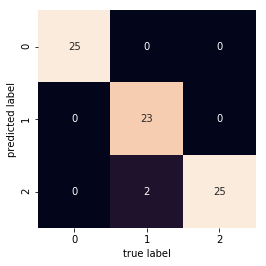

In [32]:
#sklearn knn
from sklearn.neighbors import KNeighborsClassifier
knn_sklearn = KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto',
                           leaf_size=30, p=2, metric='minkowski', metric_params=None)
knn_sklearn.fit(X_train,y_train)
y_pred_sklearn=knn_sklearn.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred_sklearn))
print(classification_report(y_test, y_pred_sklearn))
print("CONFUSE:")
mat = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)#,xticklabels=faces.target_names,yticklabels=faces.target_names
plt.xlabel('true label')
plt.ylabel('predicted label')

accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

CONFUSE:


Text(91.68, 0.5, 'predicted label')

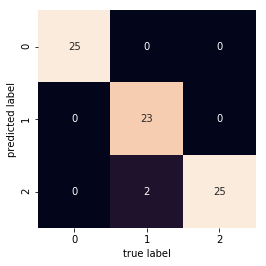

In [33]:
#sklearn knn 切dev data 調參k 1~10
knn_sklearn_cv = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                           leaf_size=30, p=2, metric='minkowski', metric_params=None)
tuned_parameters = [{
                    'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]                    
                    }]  #
model=Pipeline(steps=[('knn',knn_sklearn_cv)])
scores = ['accuracy']#'precision', 'recall','f1'
for score in scores:
    clf = GridSearchCV(model, tuned_parameters, cv=10,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(X_train, y_train) 
y_true_cv, y_pred_cv = y_test, clf.predict(X_test)
print('accuracy:',accuracy_score(y_true_cv,y_pred_cv))
print(classification_report(y_true_cv, y_pred_cv))
print("CONFUSE:")
mat = confusion_matrix(y_true_cv, y_pred_cv)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)#,xticklabels=faces.target_names,yticklabels=faces.target_names
plt.xlabel('true label')
plt.ylabel('predicted label')

In [38]:
#Report  error for k = 1, 2, 3, …, 20
# weighted knn
knn=KNNClassifier()
knn.knn='base'
knn.fit(X_train,y_train)
for i in range(1,21):
    print("k值: {0:6s}".format(str(i)),end='')
    y_pred=knn.predict(X_test,i)
    print('  accuracy: %.4f       error數量: %.0f ' %(accuracy_score(y_test,y_pred),75-75*accuracy_score(y_test,y_pred)))

k值: 1       accuracy: 0.9733       error數量: 2 
k值: 2       accuracy: 0.9733       error數量: 2 
k值: 3       accuracy: 0.9733       error數量: 2 
k值: 4       accuracy: 0.9600       error數量: 3 
k值: 5       accuracy: 0.9600       error數量: 3 
k值: 6       accuracy: 0.9600       error數量: 3 
k值: 7       accuracy: 0.9600       error數量: 3 
k值: 8       accuracy: 0.9600       error數量: 3 
k值: 9       accuracy: 0.9600       error數量: 3 
k值: 10      accuracy: 0.9733       error數量: 2 
k值: 11      accuracy: 0.9733       error數量: 2 
k值: 12      accuracy: 0.9733       error數量: 2 
k值: 13      accuracy: 0.9733       error數量: 2 
k值: 14      accuracy: 0.9733       error數量: 2 
k值: 15      accuracy: 0.9733       error數量: 2 
k值: 16      accuracy: 0.9600       error數量: 3 
k值: 17      accuracy: 0.9600       error數量: 3 
k值: 18      accuracy: 0.9733       error數量: 2 
k值: 19      accuracy: 0.9733       error數量: 2 
k值: 20      accuracy: 0.9733       error數量: 2 


In [37]:
# weighted knn
knn=KNNClassifier()
knn.knn='weighted'
knn.fit(X_train,y_train)
for k in range(1,20):
    print("k值: {0:6s}".format(str(k)))
    y_pred=knn.predict(X_test,k)
    print('accuracy:',accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))

k值: 1     
accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

k值: 2     
accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

k值: 3     
accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
         